# BGC Argo data workshop (example)

## Workshop overview
<li> Loading libraries
<li> Fetching and loading Data
<li> Filtering QC
<li> Plotting gridded data
<li> Plotting interpolated data

## Loading Libraries

In [1]:
# Loading libraries
import argopy as ar
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogLocator

### Xarray data structures
Xarray has two fundamental data structures:

<li>a DataArray, which holds a single multi-dimensional variable and its coordinates
<li>a Dataset, which holds multiple variables that potentially share the same coordinates
<br>
<br>
<b>DataArray</b>
<br>
A DataArray has four essential attributes:

*values*: a numpy.ndarray holding the array’s values
*dims*: dimension names for each axis (e.g., ('x', 'y', 'z'))
*coords*: a dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings)
*attrs*: an OrderedDict to hold arbitrary metadata (attributes)

![alt text](assets/xarray-datastructure.png)

## Fetching data

We will use the Argopy library to fetch and load data from a BGC Argo float. The documentation is available at [Argopy documentation](https://argopy.readthedocs.io/en/latest/).

![alt text](assets/argo_data_flow.png)


Here we used the fecthing function without any arguments to search for the float data. The float file has been parsed into an xarray dataset.
We can visualize the dataset using the `display` function.

![alt text](assets/DataFolder.jpg)

But this float file is supposed to have standard BGC argo variables, here we only have the physics variables.<br/>

We will specify the dataset and the source of the data to make sure we fetch the full BGC Argo dataset from ERDDAP.

In [43]:
WMO = 4903659 # Use any float wmo

argo_ds = ar.ArgoFloat(WMO).open_dataset("Sprof")

In [44]:
with ar.set_options(mode='expert'):
    ds_bgc = ar.DataFetcher(backend='erddap', ds = 'bgc').float(WMO).to_xarray()

In [45]:
display(ds_bgc)

<xarray.Dataset> Size: 29MB
Dimensions:                            (N_POINTS: 75922)
Coordinates:
    LATITUDE                           (N_POINTS) float64 607kB ...
    LONGITUDE                          (N_POINTS) float64 607kB ...
    TIME                               (N_POINTS) datetime64[ns] 607kB ...
  * N_POINTS                           (N_POINTS) int32 304kB 0 1 ... 75921
Data variables: (12/90)
    BBP700                             (N_POINTS) float32 304kB ...
    BBP700_ADJUSTED                    (N_POINTS) float32 304kB ...
    BBP700_ADJUSTED_ERROR              (N_POINTS) float32 304kB ...
    BBP700_ADJUSTED_QC                 (N_POINTS) int32 304kB 1 1 1 1 ... 1 0 1
    BBP700_DATA_MODE                   (N_POINTS) <U1 304kB 'A' 'A' ... 'A' 'A'
    BBP700_QC                          (N_POINTS) int32 304kB 1 1 1 1 ... 1 0 1
    ...                                 ...
    TEMP_ADJUSTED                      (N_POINTS) float32 304kB ...
    TEMP_ADJUSTED_ERROR                (N_POINTS) float32 304kB ...
    TEMP_ADJUSTED_QC                   (N_POINTS) int32 304kB 0 0 0 0 ... 8 1 8
    TEMP_DATA_MODE                     (N_POINTS) <U1 304kB 'R' 'R' ... 'R' 'R'
    TEMP_QC                            (N_POINTS) int32 304kB 8 8 8 8 ... 8 1 8
    TIME_QC                            (N_POINTS) int32 304kB 1 1 1 1 ... 1 1 1
Attributes:
    DATA_ID:              ARGO-BGC
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         erddap.ifremer.fr
    Fetched_by:           petit
    Fetched_date:         2026/02/11
    Fetched_constraints:  WMO4903659
    Fetched_uri:          https://erddap.ifremer.fr/erddap/tabledap/ArgoFloat...

Great, we have found the full BGC data for this float. 
Alternatively we can access the 'profile' dataset to get more information about the float trajectory and data mode. 

In [46]:
prof = ar.ArgoFloat(WMO).open_dataset('prof')

![alt text](assets/QC_FLAGs.jpg)

## Checking QC

In [47]:
argo_ds = argo_ds.rename({'CYCLE_NUMBER':'PROF_NUM'}).swap_dims({'N_PROF':'PROF_NUM'})
display(argo_ds)

<xarray.Dataset> Size: 40MB
Dimensions:                            (PROF_NUM: 68, N_PARAM: 15, N_CALIB: 1,
                                        N_LEVELS: 1486)
Coordinates:
  * PROF_NUM                           (PROF_NUM) int32 272B 1 1 2 ... 42 43 44
Dimensions without coordinates: N_PARAM, N_CALIB, N_LEVELS
Data variables: (12/134)
    DATA_TYPE                          <U32 128B ...
    FORMAT_VERSION                     <U4 16B ...
    HANDBOOK_VERSION                   <U4 16B ...
    REFERENCE_DATE_TIME                datetime64[ns] 8B ...
    DATE_CREATION                      datetime64[ns] 8B ...
    DATE_UPDATE                        datetime64[ns] 8B ...
    ...                                 ...
    BISULFIDE                          (PROF_NUM, N_LEVELS) float32 404kB ...
    BISULFIDE_QC                       (PROF_NUM, N_LEVELS) int32 404kB ...
    BISULFIDE_dPRES                    (PROF_NUM, N_LEVELS) float32 404kB ...
    BISULFIDE_ADJUSTED                 (PROF_NUM, N_LEVELS) float32 404kB ...
    BISULFIDE_ADJUSTED_QC              (PROF_NUM, N_LEVELS) int32 404kB ...
    BISULFIDE_ADJUSTED_ERROR           (PROF_NUM, N_LEVELS) float32 404kB ...
Attributes:
    title:                Argo float vertical profile
    institution:          CORIOLIS
    source:               Argo float
    history:              2025-06-10T16:25:53Z creation (software version 1.1...
    references:           http://www.argodatamgt.org/Documentation
    user_manual_version:  1.0
    Conventions:          Argo-3.1 CF-1.6
    featureType:          trajectoryProfile
    software_version:     1.19 (version 12.05.2025 for ARGO_simplified_profile)
    id:                   https://doi.org/10.17882/42182

C:\Users\petit\AppData\Local\Temp\ipykernel_10000\414752045.py:19: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(time_2D,argo_ds['PRES'].values,argo_ds['CHLA'].values,cmap=cmap)
C:\Users\petit\AppData\Local\Temp\ipykernel_10000\414752045.py:23: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(time_2D,argo_ds['PRES'].values,argo_ds['CHLA_QC'].values.astype(float),cmap='Set1',vmin=0.5,vmax=9.5)
C:\Users\petit\AppData\Local\Temp\ipykernel_10000\414752045.py:27: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decr

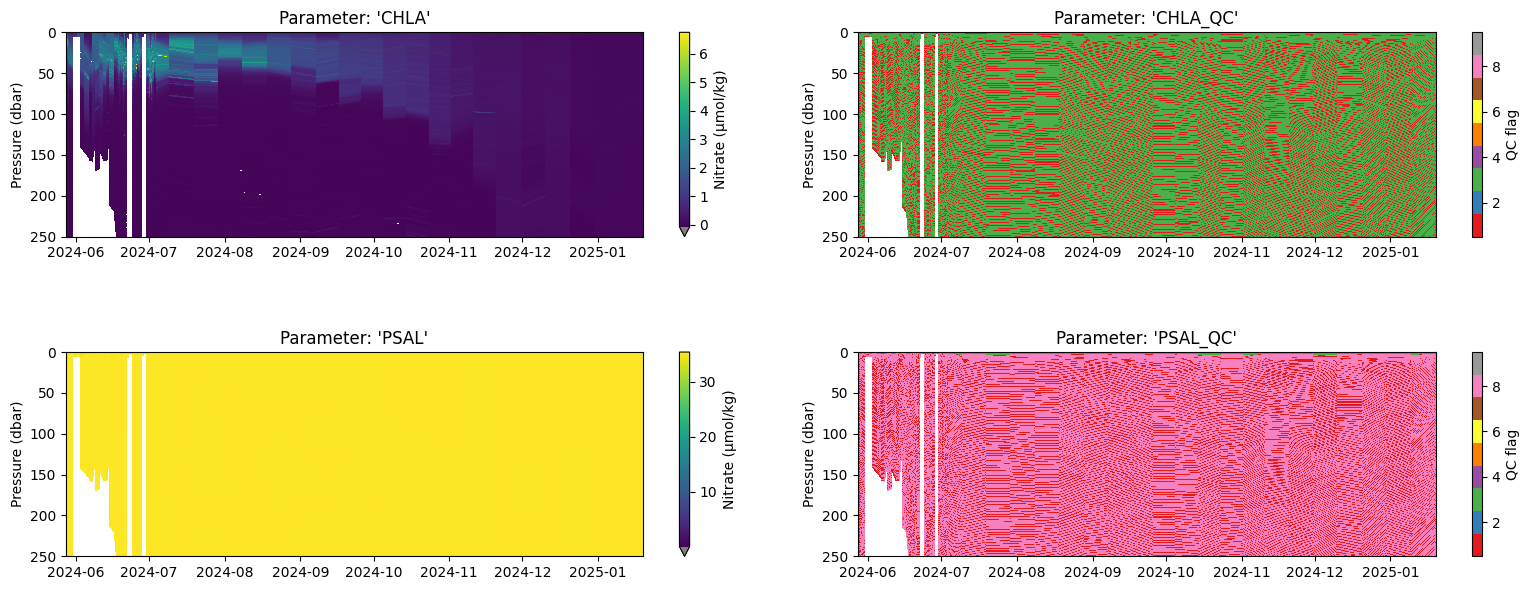

In [48]:
# Stack NumPy array of datetimes to create a 2D grid
time_2D = np.tile(argo_ds['JULD'].values,(len(argo_ds['N_LEVELS']),1)).T

# Function for repetitive parts of plot
def config_depth_section(cbar_label,title):
  plt.ylim([0,250])
  plt.gca().invert_yaxis()
  plt.ylabel('Pressure (dbar)')
  if 'Nitrate' in cbar_label: extend = 'min'
  else:                       extend = 'neither'
  plt.colorbar(label=cbar_label,extend=extend)
  plt.title(title)

# Create subplots
plt.figure(figsize=(16,6))
plt.subplot(2,2,1)
cmap = plt.get_cmap('viridis')
cmap.set_under('0.5')
plt.pcolor(time_2D,argo_ds['PRES'].values,argo_ds['CHLA'].values,cmap=cmap)
config_depth_section('Nitrate (µmol/kg)',"Parameter: 'CHLA'")

plt.subplot(2,2,2)
plt.pcolor(time_2D,argo_ds['PRES'].values,argo_ds['CHLA_QC'].values.astype(float),cmap='Set1',vmin=0.5,vmax=9.5)
config_depth_section('QC flag',"Parameter: 'CHLA_QC'")

plt.subplot(2,2,3)
plt.pcolor(time_2D,argo_ds['PRES'].values,argo_ds['PSAL'].values,cmap=cmap)
config_depth_section('Nitrate (µmol/kg)',"Parameter: 'PSAL'")

plt.subplot(2,2,4)
plt.pcolor(time_2D,argo_ds['PRES'].values,argo_ds['PSAL_QC'].values.astype(float),cmap='Set1',vmin=0.5,vmax=9.5)
config_depth_section('QC flag',"Parameter: 'PSAL_QC'")

plt.tight_layout(h_pad=5,w_pad=3)

## Basic plotting

We can first easily visualise the trajectory of the float with a scatter plot.

C:\Users\petit\AppData\Local\Temp\ipykernel_10000\580248313.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


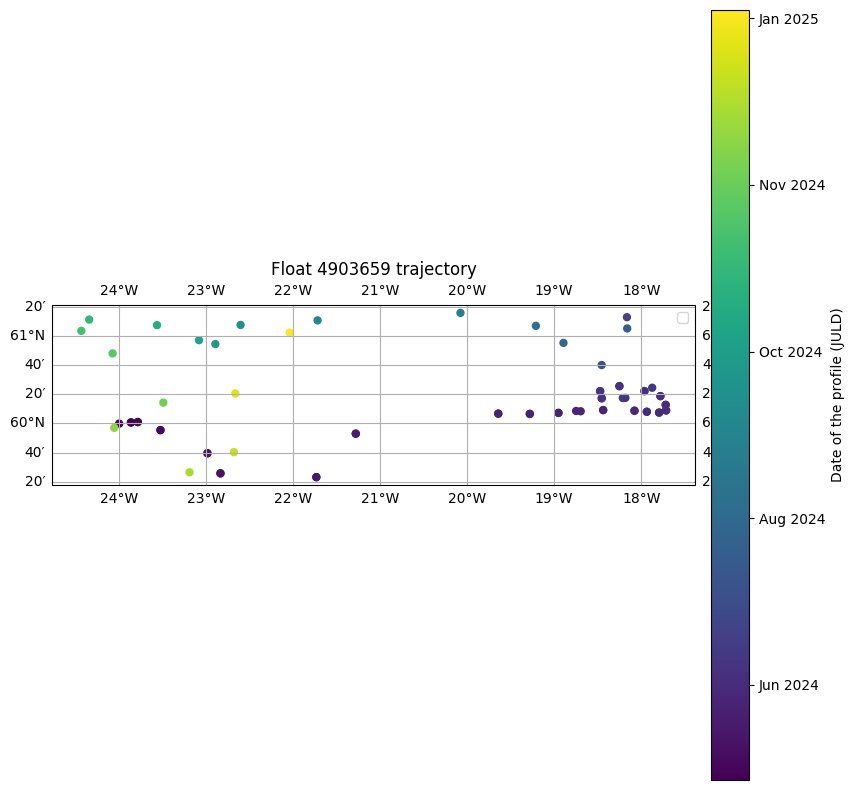

In [49]:
import cartopy.crs as ccrs
import cartopy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


dates = pd.to_datetime(prof['JULD'])
date_nums = mdates.date2num(dates)   

fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection': ccrs.PlateCarree()})      
ax.scatter(prof['LONGITUDE'].values, prof['LATITUDE'].values,c = date_nums, cmap='viridis', s=25)
#format cbar to show JULD as month year
cbar = plt.colorbar(ax.collections[0], ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Date of the profile (JULD)')
cbar.ax.yaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

ax.add_feature(cartopy.feature.LAND.with_scale('10m'))
ax.add_feature(cartopy.feature.COASTLINE.with_scale('10m'), edgecolor='black')

ax.legend()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

ax.set_title(f"Float {prof.PLATFORM_NUMBER[0].astype(str).values} trajectory")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [50]:
prei=np.arange(5,1000,5) # we define a common set of pressure values:

In [51]:
juld=prof.JULD.values
psal=prof.PSAL.values
temp=prof.TEMP.values
pres=prof.PRES.values
#filter psali to only keep values > 32
#psal[psal <= 34] = np.nan

psali= np.zeros((juld.shape[0],prei.shape[0]))

psali.fill(np.nan)

tempi= np.zeros((juld.shape[0],prei.shape[0]))
tempi.fill(np.nan)

chlai= np.zeros((juld.shape[0],prei.shape[0]))
chlai.fill(np.nan)

In [52]:
for ip in range(0,pres.shape[0]-1):
    psali[ip,:]=np.interp(prei,pres[ip,:],psal[ip,:])
    tempi[ip,:]=np.interp(prei,pres[ip,:],temp[ip,:])



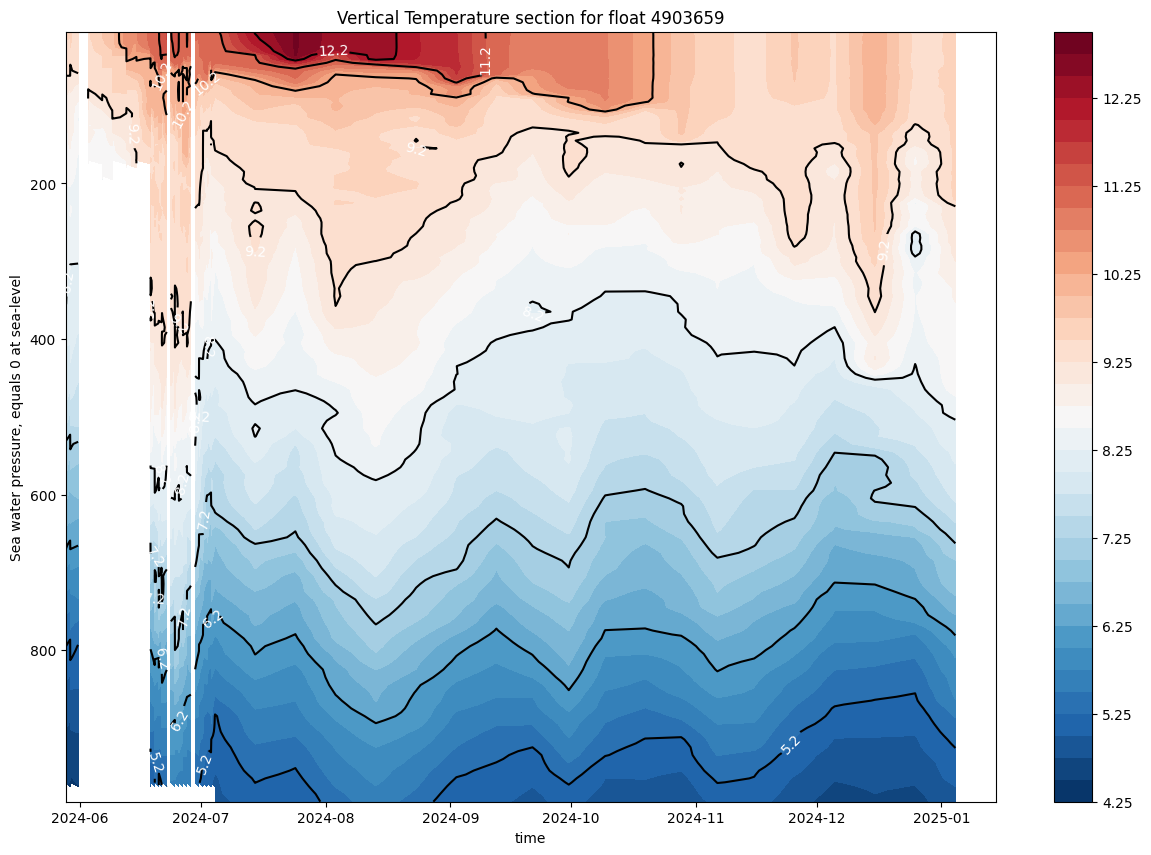

In [53]:
fig, ax = plt.subplots(figsize=(15,10))

#Draw the contours for the salinity
cs=ax.contourf(juld,prei,tempi.transpose(),40,cmap="RdBu_r")

#Draw the contours lines to be labelled
cs2=ax.contour(juld,prei,tempi.transpose(),colors=('k'), levels=cs.levels[::4])

#Since pressure increase away from the surface we invert the y-axis
ax.invert_yaxis()
ax.clabel(cs2, fmt='%2.1f', colors='w', fontsize=10)

#Add the titles
ax.set_title(f"Vertical Temperature section for float {prof.PLATFORM_NUMBER[0].astype(str).values}")
ax.set_xlabel(f"{prof.JULD.standard_name}")
ax.set_ylabel(f"{prof.PRES.long_name}")

#Add the colorbar
cbar=fig.colorbar(cs,ax=ax)

We can visualise the transect of the float with a bit more data manipulation. We will regrid the data in depth and time, and then plot the data as a 2D image.


In [54]:
def plot_transect(ds, varname, depth_min = 0, depth_max = 200, log_scale=False):
    # Build dataset from point-form arrays
    ds_points = xr.Dataset(
        {
            "VAR": ("obs", ds[varname].values),
            "PRES": ("obs", ds['PRES'].values),
            "TIME": ("obs", ds['TIME'].values)
        }
    )

    # Unique profile times
    times_unique = np.unique(ds_points['TIME'].values)

    # Regular pressure grid
    depth_grid = np.arange(depth_min, depth_max, 1)  # adjust range and step as needed

    profiles = []
    for t in times_unique:
        # Select all measurements at this time
        mask_time = ds_points['TIME'].values == t
        pres_vals = ds_points['PRES'].values[mask_time]
        var_vals = ds_points['VAR'].values[mask_time]
        
        # Drop NaNs before interpolation
        mask_valid = np.isfinite(pres_vals) & np.isfinite(var_vals)
        if mask_valid.sum() > 1:
            var_interp = np.interp(depth_grid, pres_vals[mask_valid], var_vals[mask_valid],
                                    left=np.nan, right=np.nan)
        else:
            var_interp = np.full_like(depth_grid, np.nan, dtype=float)
        profiles.append(var_interp)

    # Convert to xarray DataArray for plotting
    var_section = xr.DataArray(
        np.array(profiles),
        coords={"TIME": times_unique, "PRES": depth_grid},
        dims=("TIME", "PRES")
    )
    #units = ds[varname].attrs['units']

    # Plot section
    plt.figure(figsize=(12, 6))
    if log_scale:
        pcm = plt.pcolormesh(
        var_section['TIME'],
        var_section['PRES'],
        var_section.T,
        shading='auto',
        cmap='viridis',
        norm=LogNorm(vmin=1e-3, vmax=np.nanmax(var_section))  # adjust vmin as needed
    )
    else:
        pcm = plt.pcolormesh(var_section['TIME'], var_section['PRES'], var_section.T,
                            shading='auto', cmap='viridis')
    plt.gca().invert_yaxis()
    #plt.colorbar(pcm, label=f'{varname} {units}')
    plt.xlabel('Time')
    plt.ylabel('Pressure (dbar)')
    plt.title(f'BGC-Argo {varname} Section (Depth vs Time)')
    plt.tight_layout()
    plt.show()

Using this function you can change arguments to make a plot of any variable in the dataset, change the depth range or the log scale of the colorbar.

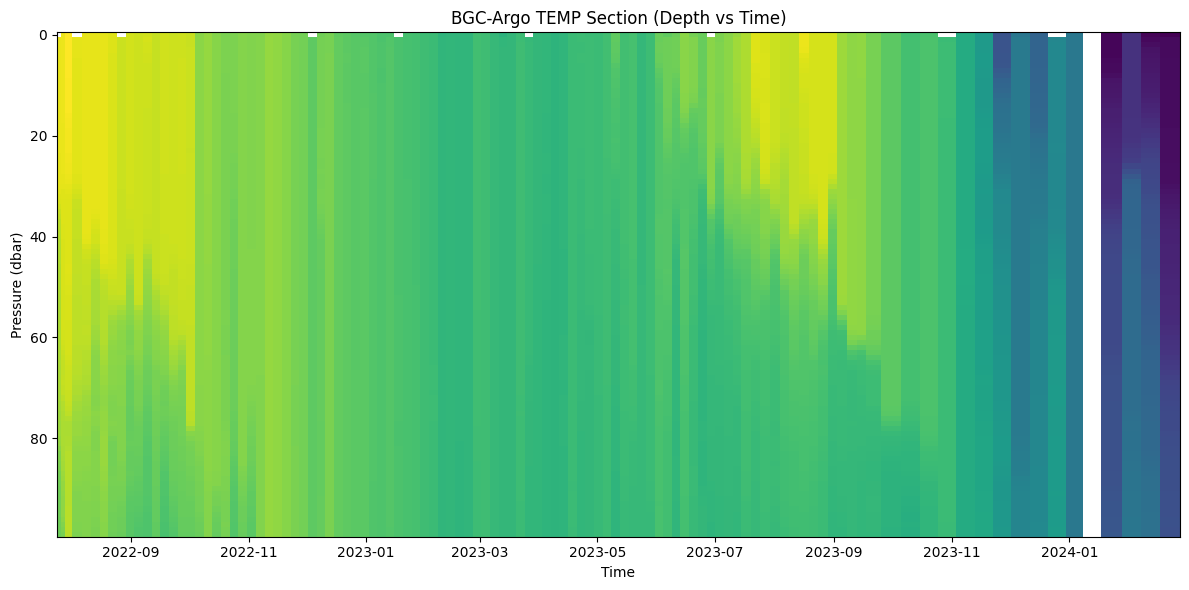

In [25]:
plot_transect(ds_bgc, 'TEMP', depth_max = 100, log_scale=False)

We can make things look a bit nicer by interpolating the data over depth and time. 

In [55]:
#filter ds_bgc to keep date before 2023-11
ds_bgc = ds_bgc.where(ds_bgc['TIME'] < np.datetime64('2023-11-01'), drop=True)

In [56]:

def plot_interpolated_section(ds_bgc, varname='CHLA_ADJUSTED', depth_min=0, depth_max=200, log_scale=True, palette = 'viridis'):
    # Build dataset from point-form arrays
    ds_points = xr.Dataset(
        {
            "VAR": ("obs", ds_bgc[varname].values),
            "PRES": ("obs", ds_bgc['PRES'].values),
            "TIME": ("obs", ds_bgc['TIME'].values)
        }
    )

    # Unique profile times
    times_unique = np.unique(ds_points['TIME'].values)

    # Regular pressure grid
    depth_grid = np.arange(depth_min, depth_max + 1, 1)  # include depth_max

    profiles = []
    for t in times_unique:
        mask_time = ds_points['TIME'].values == t
        pres_vals = ds_points['PRES'].values[mask_time]
        var_vals = ds_points['VAR'].values[mask_time]


        # Valid mask
        mask_valid = np.isfinite(pres_vals) & np.isfinite(var_vals)
        if mask_valid.sum() > 1:
            var_interp = np.interp(depth_grid, pres_vals[mask_valid], var_vals[mask_valid],
                                   left=np.nan, right=np.nan)
        else:
            var_interp = np.full_like(depth_grid, np.nan, dtype=float)
        profiles.append(var_interp)

    # Create DataArray for gridded section
    var_section = xr.DataArray(
        np.array(profiles),
        coords={"TIME": times_unique, "PRES": depth_grid},
        dims=("TIME", "PRES")
    )

    # Interpolate in time for smoothness
    time_fine = np.linspace(
        np.min(times_unique.astype("datetime64[s]").astype(float)),
        np.max(times_unique.astype("datetime64[s]").astype(float)),
        500
    ).astype("datetime64[s]")

    var_section_smooth = var_section.interp(TIME=time_fine)

    # Plotting
    plt.figure(figsize=(14, 6))

    if log_scale:
        vmin = np.nanmax([1e-6, np.nanmin(var_section_smooth.values[var_section_smooth.values > 0])])
        vmax = np.nanmax(var_section_smooth.values)
        norm = LogNorm(vmin=vmin, vmax=vmax)
        pcm = plt.pcolormesh(
            var_section_smooth['TIME'],
            var_section_smooth['PRES'],
            var_section_smooth.T,
            shading='auto',
            cmap=palette,
            norm=norm
        )
        cbar = plt.colorbar(pcm, label=f'{varname} (log scale)')
        cbar.ax.yaxis.set_major_locator(LogLocator(base=10, subs=(1, 2, 5)))
    else:
        pcm = plt.pcolormesh(
            var_section_smooth['TIME'],
            var_section_smooth['PRES'],
            var_section_smooth.T,
            shading='auto',
            cmap=palette
        )
        plt.colorbar(pcm, label=varname)

    plt.gca().invert_yaxis()
    plt.xlabel('Time')
    plt.ylabel('Pressure (dbar)')
    plt.title(f'Interpolated BGC-Argo {varname} Section (Depth vs Time)')
    plt.tight_layout()
    plt.show()


Again you can tune the args of the function to plot what you want !